### Projet TSP

In [1]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from math import dist

In [2]:
class SolverTSP:
    def __init__(self, position):
        self.position = position
        self.distance = cdist(position,position)
    
    def Cost(self):
        Total_cost = np.sum(self.Solve()[1])
        return(Total_cost)
    
    def Solve(self):
        # permutation optimale
        nbville = len(self.position)
        actuel = 0
        ppv = [actuel] # prochain point de vente
        cout = []
        for i in range(0,nbville-1):
            selection = min(np.delete(self.distance[ppv[-1]],ppv))
            cout.append(selection)
            ppv.append(np.where(self.distance[ppv[-1]] == selection)[0][0])
        dist = self.distance[ppv[0]][ppv[-1]]
        cout.append(dist)
        return(ppv , cout)
    
    def dessine_tour(self):
        Total_cost = self.Cost()
        permutations = self.Solve()[0]
        fig, ax = plt.subplots(1, 1, figsize=(4, 4))
        ax.plot(self.position[permutations, 0], self.position[permutations, 1], 'b-o') #trâce tous les (x, y) dans l'ordre des permutations
        ax.plot([self.position[permutations[0], 0], self.position[permutations[-1], 0]],
                [self.position[permutations[0], 1], self.position[permutations[-1], 1]], 'b-o') # ajoute la ligne entre la 1ère et dernière ligne
        for i, txt in enumerate(range(0, len(self.position))):
            ax.annotate(txt, (self.position[i, 0], self.position[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')
        plt.title(f"Total cost Solver 1 : {Total_cost}")
        return (ax)

### Now we test our solution : 

[[0.11833126 0.08539807]
 [0.61592725 0.91493207]
 [0.04655567 0.61523889]
 [0.2559761  0.33811116]
 [0.03148578 0.22640393]
 [0.53665318 0.75185366]
 [0.04914546 0.44613276]
 [0.01084824 0.16904343]
 [0.56133296 0.92171456]
 [0.60480128 0.36429917]
 [0.1661439  0.3861723 ]
 [0.65114299 0.93440128]
 [0.28458917 0.88454223]
 [0.89371244 0.28359035]
 [0.99778689 0.55611302]
 [0.58099562 0.87788552]
 [0.81749561 0.19254745]
 [0.84296361 0.73291425]
 [0.130044   0.9604197 ]
 [0.90820353 0.51582012]
 [0.62710508 0.7193774 ]
 [0.7802317  0.19268533]
 [0.61115147 0.22505548]
 [0.16101236 0.07809988]
 [0.1895521  0.03477932]
 [0.64392711 0.35901943]
 [0.35232479 0.19765745]
 [0.63646224 0.97797799]
 [0.69362244 0.420587  ]
 [0.83678682 0.99507466]
 [0.2015489  0.13051203]
 [0.71359089 0.22151038]
 [0.30769696 0.28618692]
 [0.18367991 0.1777305 ]
 [0.40157069 0.57132899]
 [0.17495544 0.74550434]
 [0.02229599 0.23964269]
 [0.48877489 0.79530097]
 [0.13029226 0.12195102]
 [0.47749908 0.68271201]


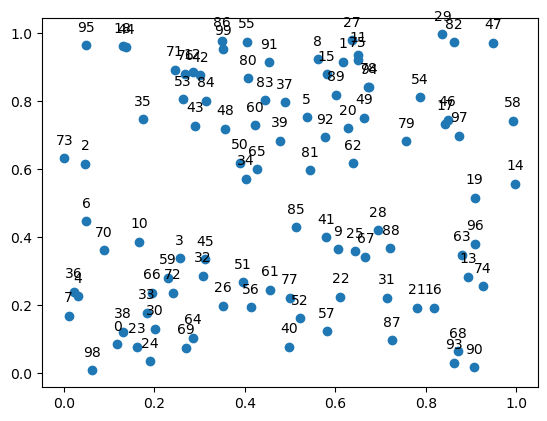

In [3]:
nbville = 100
position = np.random.uniform(0, 1, size=(nbville,2))
print(position)

plt.plot(position[:, 0], position[:, 1], 'o')
for i, txt in enumerate(range(0, nbville)):
    plt.annotate(txt, (position[i, 0], position[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

The matrix of distances is : [[0.         0.96733056 0.53468031 ... 0.97262128 0.09530721 0.89814025]
 [0.96733056 0.         0.64342832 ... 0.33760451 1.06232379 0.26697609]
 [0.53468031 0.64342832 0.         ... 0.83171311 0.60731914 0.45492769]
 ...
 [0.97262128 0.33760451 0.83171311 ... 0.         1.06490104 0.58154357]
 [0.09530721 1.06232379 0.60731914 ... 1.06490104 0.         0.98782822]
 [0.89814025 0.26697609 0.45492769 ... 0.58154357 0.98782822 0.        ]] 

The cities to visit are : [[0.11833126 0.08539807]
 [0.61592725 0.91493207]
 [0.04655567 0.61523889]
 [0.2559761  0.33811116]
 [0.03148578 0.22640393]
 [0.53665318 0.75185366]
 [0.04914546 0.44613276]
 [0.01084824 0.16904343]
 [0.56133296 0.92171456]
 [0.60480128 0.36429917]
 [0.1661439  0.3861723 ]
 [0.65114299 0.93440128]
 [0.28458917 0.88454223]
 [0.89371244 0.28359035]
 [0.99778689 0.55611302]
 [0.58099562 0.87788552]
 [0.81749561 0.19254745]
 [0.84296361 0.73291425]
 [0.130044   0.9604197 ]
 [0.90820353 0.51582012]

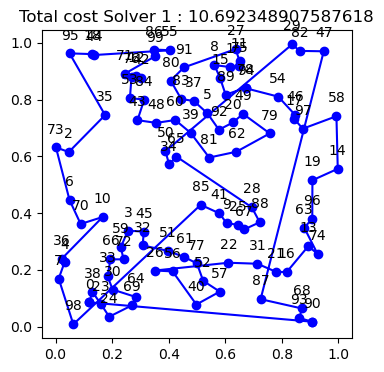

In [4]:
x = SolverTSP(position)

print(f'The matrix of distances is : {x.distance} \n')

print(f'The cities to visit are : {x.position} \n')

perm = x.Solve()[0]
print(f'The sequence of the traveled cities is : {perm} \n')

cout = x.Cost()
print(f'The total distance traveled is {cout}\n')

draw = x.dessine_tour()
print(f'The drawing of the route is as follows {draw} \n')

### Solution bis 

In [5]:
class SolverTSP2:
    def __init__(self, position):
        self.position = position
        self.distance = cdist(position,position)
    
    def Solve(self):
        # permutation optimale
        Totalcost = []
        Totalppv = []
        nbville = len(position)
        for j in range (0, nbville):
            actuel = j
            ppv = [actuel] # prochain point de vente
            cout = []
            for i in range(0,nbville-1):
                selection = min(np.delete(self.distance[ppv[-1]],ppv))
                cout.append(selection)
                ppv.append(np.where(self.distance[ppv[-1]] == selection)[0][0])
            dist = self.distance[ppv[0]][ppv[-1]]
            cout.append(dist)
            Totalcost.append(np.sum(cout))
            Totalppv.append(ppv)
        mincost = min(Totalcost) 
        index = Totalcost.index(mincost)
        optimalppv = Totalppv[index]
        return(optimalppv , mincost)
    
    def dessine_tour(self):
        mincost = self.Solve()[1]
        permutations = self.Solve()[0]
        fig, ax = plt.subplots(1, 1, figsize=(4, 4))
        ax.plot(self.position[permutations, 0], self.position[permutations, 1], 'b-o') #trâce tous les (x, y) dans l'ordre des permutations
        ax.plot([self.position[permutations[0], 0], self.position[permutations[-1], 0]],
                [self.position[permutations[0], 1], self.position[permutations[-1], 1]], 'b-o') # ajoute la ligne entre la 1ère et dernière ligne
        for i, txt in enumerate(range(0, len(self.position))):
            ax.annotate(txt, (self.position[i, 0], self.position[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')
        plt.title(f"Total cost Solver 2 : {mincost}")
        return (ax)

The matrix of distances is : [[0.         0.96733056 0.53468031 ... 0.97262128 0.09530721 0.89814025]
 [0.96733056 0.         0.64342832 ... 0.33760451 1.06232379 0.26697609]
 [0.53468031 0.64342832 0.         ... 0.83171311 0.60731914 0.45492769]
 ...
 [0.97262128 0.33760451 0.83171311 ... 0.         1.06490104 0.58154357]
 [0.09530721 1.06232379 0.60731914 ... 1.06490104 0.         0.98782822]
 [0.89814025 0.26697609 0.45492769 ... 0.58154357 0.98782822 0.        ]] 

The cities to visit are : [[0.11833126 0.08539807]
 [0.61592725 0.91493207]
 [0.04655567 0.61523889]
 [0.2559761  0.33811116]
 [0.03148578 0.22640393]
 [0.53665318 0.75185366]
 [0.04914546 0.44613276]
 [0.01084824 0.16904343]
 [0.56133296 0.92171456]
 [0.60480128 0.36429917]
 [0.1661439  0.3861723 ]
 [0.65114299 0.93440128]
 [0.28458917 0.88454223]
 [0.89371244 0.28359035]
 [0.99778689 0.55611302]
 [0.58099562 0.87788552]
 [0.81749561 0.19254745]
 [0.84296361 0.73291425]
 [0.130044   0.9604197 ]
 [0.90820353 0.51582012]

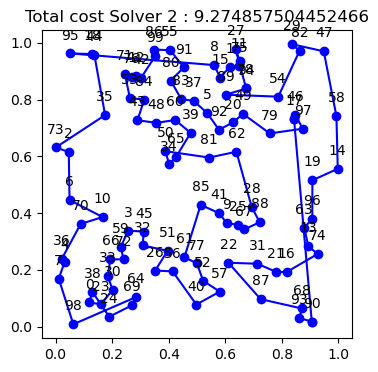

In [6]:
x2 = SolverTSP2(position)

print(f'The matrix of distances is : {x2.distance} \n')

print(f'The cities to visit are : {x2.position} \n')

perm = x2.Solve()[0]
print(f'The sequence of the traveled cities is : {perm} \n')

draw = x2.dessine_tour()
print(f'The drawing of the route is as follows {draw} \n')